In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [103]:
#download the weather images and put them in a directory
path = path = "/Users/andrewfearney27/Downloads/Multi-class Weather Dataset"

folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', '.DS_Store', 'Shine', 'Sunrise']


In [104]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [105]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [106]:
# compile and run the model
model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator,
    epochs=25,
    steps_per_epoch=train_generator.n // train_generator.batch_size-1,
    validation_data=test_generator,
    validation_steps=test_generator.n // train_generator.batch_size-1,
)

Epoch 1/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 23s 795ms/step - accuracy: 0.3880 - loss: 0.1719 - val_accuracy: 0.5260 - val_loss: 0.1225
Epoch 2/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5116 - loss: 0.1318 - val_accuracy: 0.3125 - val_loss: 0.1673
Epoch 3/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 725ms/step - accuracy: 0.6012 - loss: 0.1111 - val_accuracy: 0.6406 - val_loss: 0.1068
Epoch 4/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6898 - loss: 0.0993 - val_accuracy: 0.7500 - val_loss: 0.0688
Epoch 5/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 729ms/step - accuracy: 0.7285 - loss: 0.0862 - val_accuracy: 0.7188 - val_loss: 0.1052
Epoch 6/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7477 - loss: 0.0808 - val_accuracy: 0.7500 - val_loss: 0.0998
Epoch 7/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 22s 781ms/step - accuracy: 0.7680 - loss: 0.0818 - val_accuracy: 0.6198 - val_loss: 0.1277
Epoch 8/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6586 - loss: 0.0991 - val_accuracy: 0.

In [107]:
results = pd.DataFrame(model.history.history)

In [108]:
results

,accuracy,loss,val_accuracy,val_loss
0,0.481481,0.145067,0.526042,0.122537
1,0.515625,0.131806,0.312500,0.167337
2,0.648746,0.106772,0.640625,0.106778
3,0.687500,0.100246,0.750000,0.068795
4,0.721625,0.087468,0.718750,0.105161
5,0.750000,0.080550,0.750000,0.099759
6,0.761051,0.083644,0.619792,0.127689
7,0.656250,0.099688,0.718750,0.106789
8,0.799283,0.072341,0.822917,0.068073
9,0.781250,0.088046,0.812500,0.063723


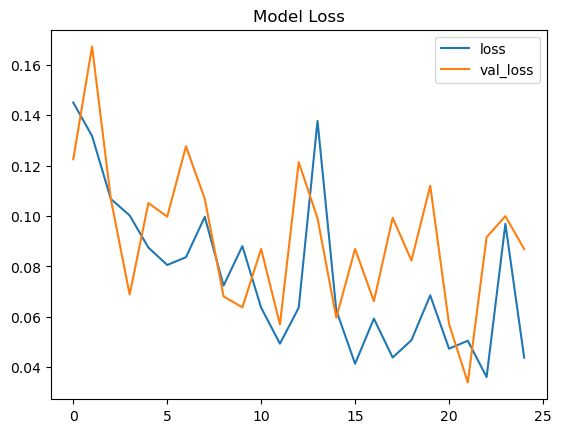

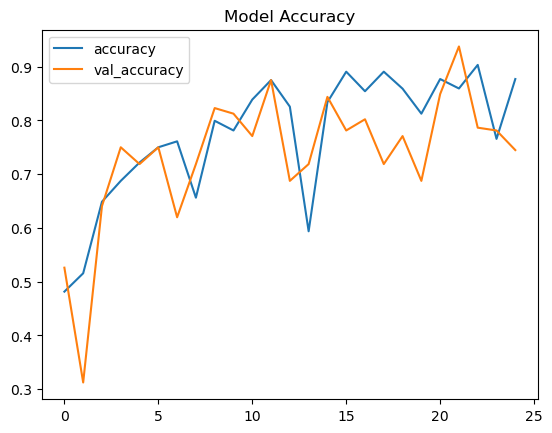

In [109]:

results[['loss', 'val_loss']].plot(title="Model Loss")
plt.savefig('./loss.png')
plt.show()

results[['accuracy', 'val_accuracy']].plot(title="Model Accuracy")
plt.savefig('./accuracy.png')
plt.show()


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step


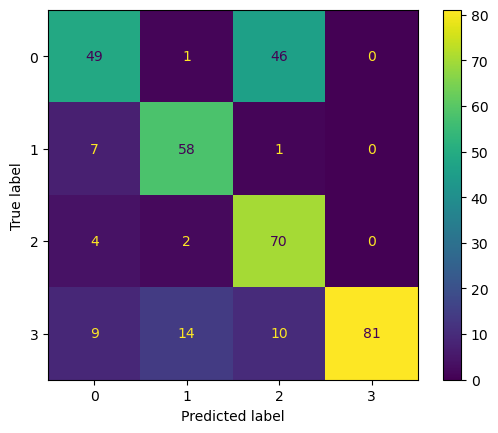

In [110]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [111]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


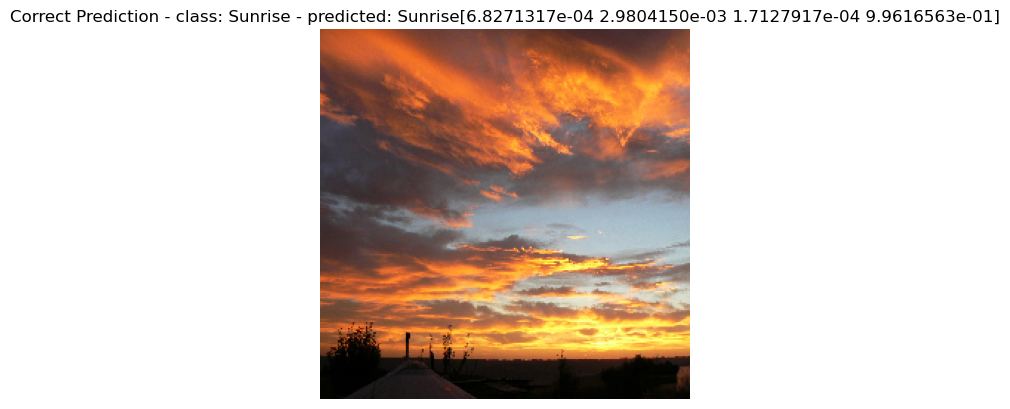

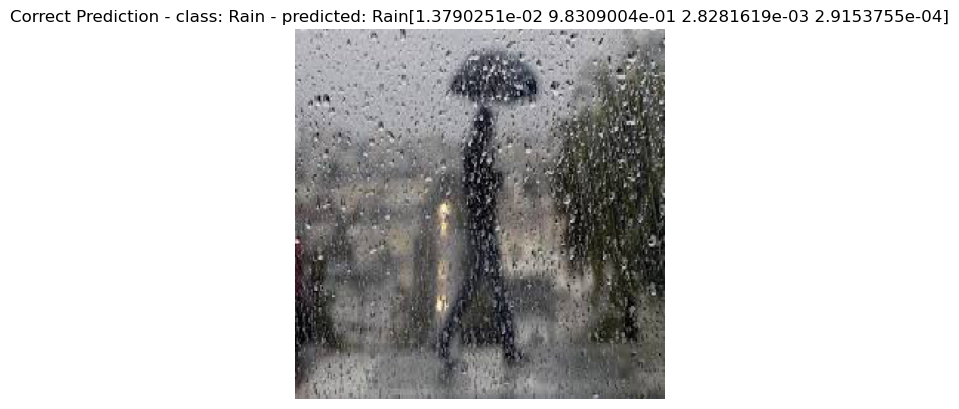

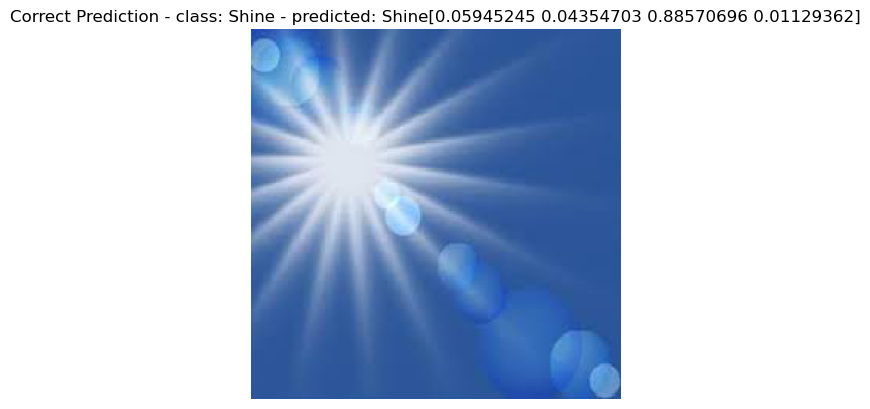

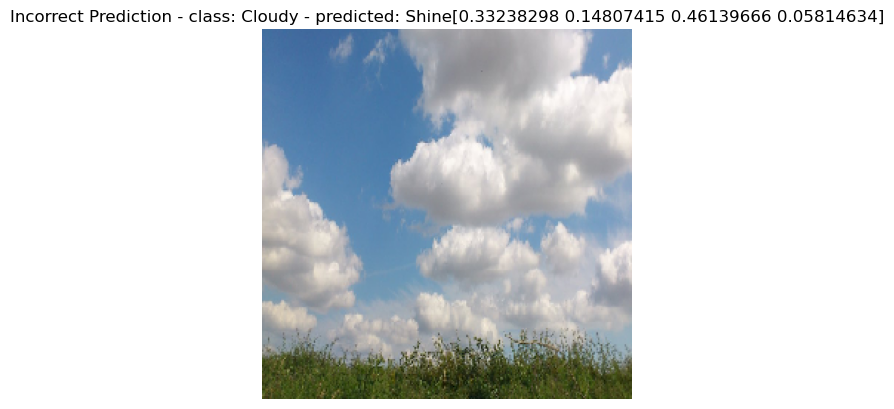

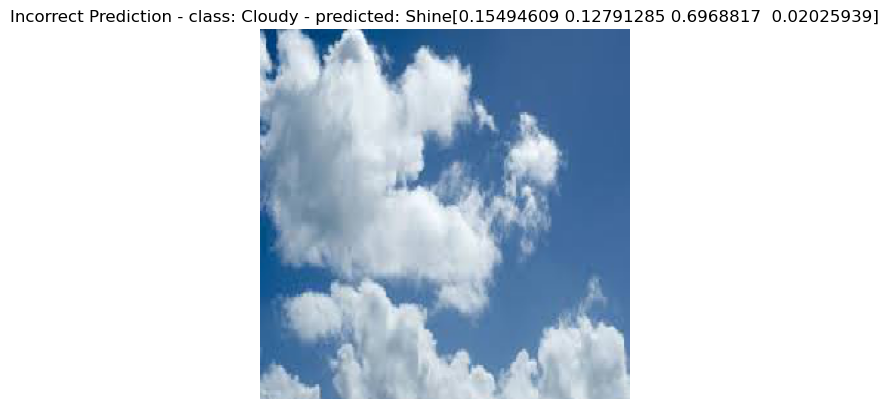

In [112]:
predict_one(model, 5) #<--you can show multiple pictures with this command. Just fill in the number you want to see.